## 자동차 연비 데이터셋

- [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)의 [
Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/auto+mpg)에서 다운로드
 
 
- [Kaggle](https://www.kaggle.com/)의
[Auto-mpg dataset](https://www.kaggle.com/uciml/autompg-dataset)에서 다운로드

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. 데이터 탐색

#### 1.1 데이터 적재

#### 1.2 데이터 일부 확인

0. mpg: continuous
1. cylinders: multi-valued discrete
2. displacement: continuous
3. horsepower: continuous
4. weight: continuous
5. acceleration: continuous
6. model year: multi-valued discrete
7. origin: multi-valued discrete
8. car name: string (unique for each instance)

#### 1.3 열 이름 지정

* 예 : ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']

- mpg : 연비
- cylinders : 실린더수 
- displacement : 배기량
- horsepower: 출력
- weight : 차중
- acceleration : 가속능력
- model year : 출시년도
- origin : 제조국 1(USA), 2(EU), 3(JPN)
- name : 모델명

#### 1.4 데이터 형상 확인

#### 1.5 데이터 요약정보 확인(데이터 타입, 누락정보)

#### 1.6 데이터 자료형 확인 

#### 1.7 Series(horsepower 열)의 자료형 확인 

* (Question) horsepower는 숫자 데이터인데 왜 object 형으로 반환되었을까?
* (Answer)

#### 1.8 제조국(origin) 특성의 데이터 분포(건수) 확인하기
- 1(USA), 2(EU), 3(JPN)

#### 1.9 제조국(origin) 특성을 histogram으로 표현하기

<AxesSubplot:>

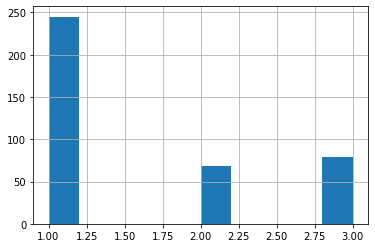

#### 1.10 coutry 컬럼 추가하기
* 제조국 1, 2, 3을 각각 "USA", "Europe", "Japan"으로 대체한 값 적용

* coutry 특성으로 groupby하여 "국가당 몇건"의 샘플이 있는지 확인하기

- 위에서 구한 국가당 레코드수를 파이차트 그리기

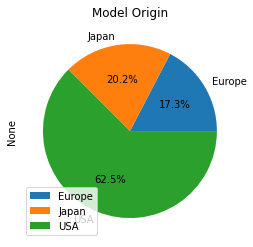

#### 1.11 국가별(coutry) mpg 값의 분포를 boxplot으로 확인하기
- (Question) mpg의 평균값이 가장 낮은 국가는?
- (Answer)

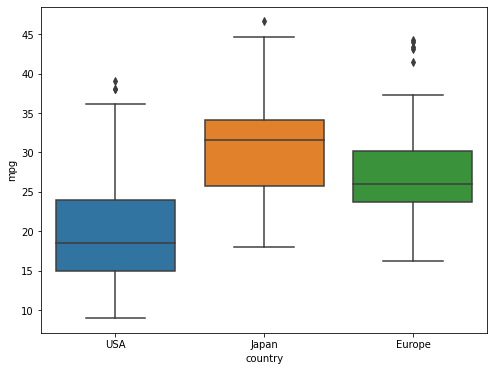

#### 1.12 통계 정보 확인 

#### 1.13 특성들 간의 상관관계 구하기 

- 상관계수 매트릭스 : df.corr() 이용

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


- (시각화 1) 상관계수 산점도로 시각화 하기 : pd.plotting.scatter matrix()

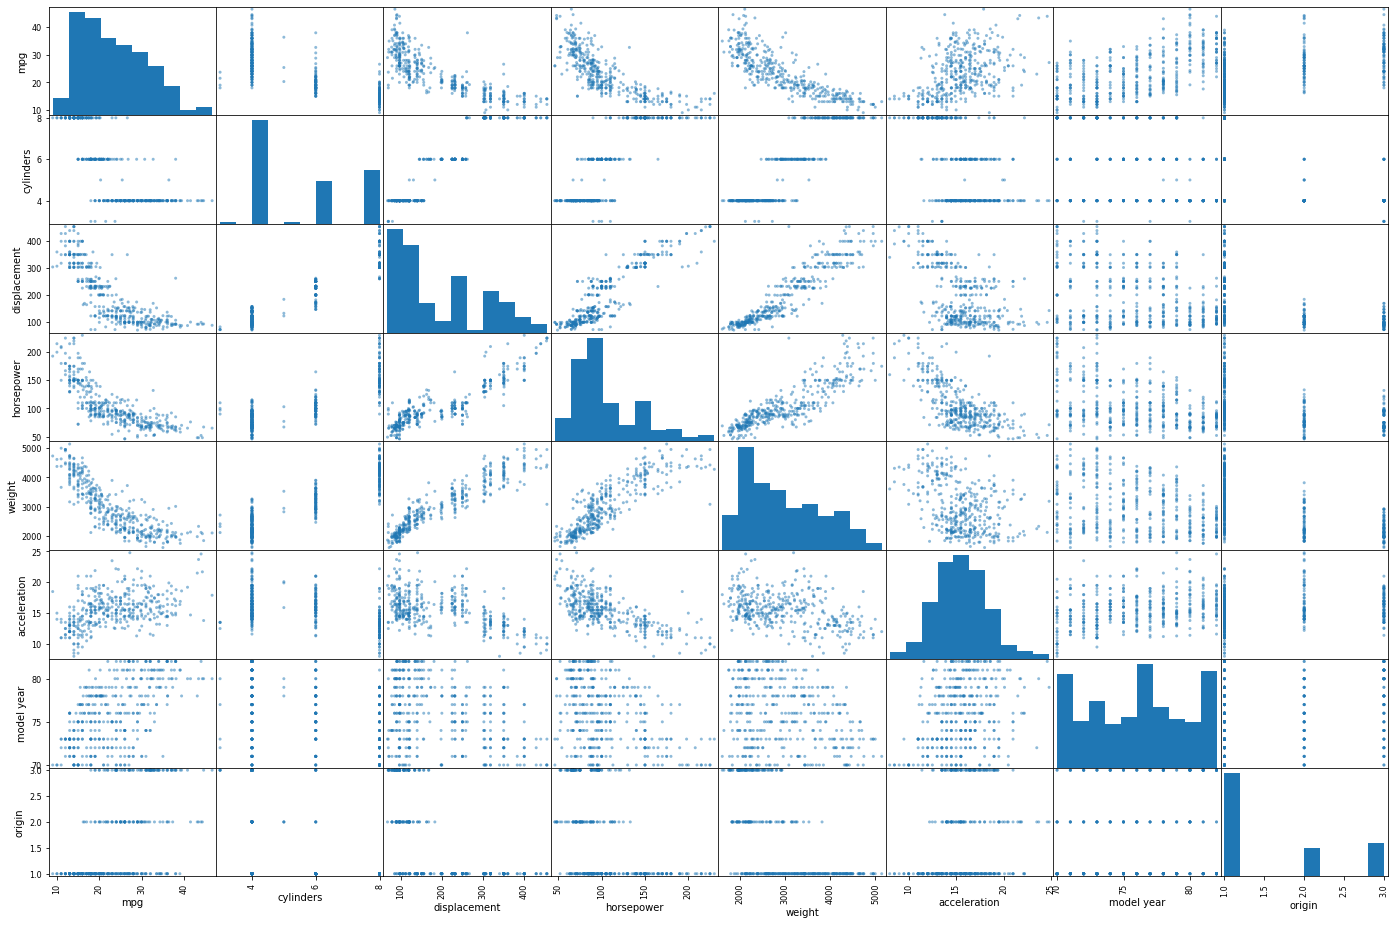

- (시각화 2) 상관계수 히트맵으로 시각화하기

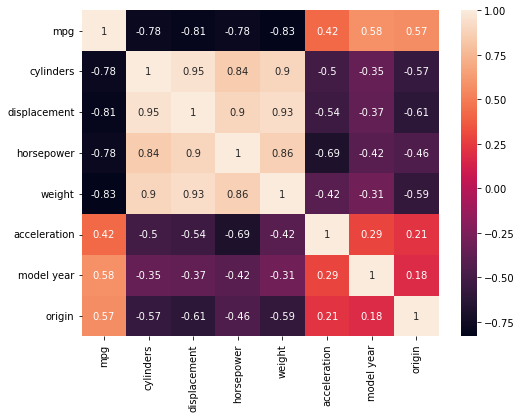

* (Question) 타깃(mpg)와의 상관계수가 가장 높은 특성은?
* (Answer)

* [컬러맵 정보](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

- weight 특성과, mpg(타깃) 의 상관관계 및 산점도

,mpg,weight
mpg,1.000000,-0.832244
weight,-0.832244,1.000000


<AxesSubplot:xlabel='weight', ylabel='mpg'>

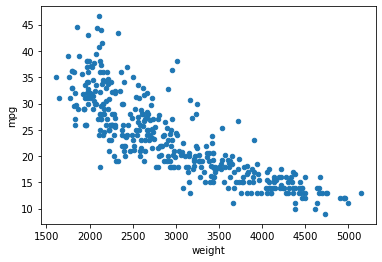

## 2. 데이터 전처리

#### 2.1 누락 데이터 처리하기

- horsepower 열의 ('?')를 np.nan으로 변경

- 누락 데이터 수 확인

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

- 누락 데이터 삭제하기 (해당 레코드를 삭제하기, 특성을 삭제하는것이 아님)

- 데이터 개수 확인 (원본 데이터에서 삭제한 행만큼 줄어있음)

mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model year      392
origin          392
name            392
dtype: int64

- horserpower 특성의 데이터 타입(object)을 실수형으로 변환

#### 2.2 country(또는 origin) 특성을 더미변수로 변환

- pd.get_dummies

    Europe  Japan  USA
0        0      0    1
1        0      0    1
2        0      0    1
3        0      0    1
4        0      0    1
5        0      0    1
6        0      0    1
7        0      0    1
8        0      0    1
9        0      0    1
10       0      0    1
11       0      0    1
12       0      0    1
13       0      0    1
14       0      1    0


- 기존 컬럼 삭제후 새로 만든 dummy 변수를 추가하기

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,name,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,0,0,1


#### 2.3 불필요한 특성 삭제

* 자동차 이름은 예측에 영향을 안줄것으로 판단하여 삭제

#### 2.4 표준화(또는 정규화)로 Scale 조정

- 정규화, 표준화(파이썬 함수)

In [53]:
def minmax_normalize(arr): # 정규화 함수
    return (arr-arr.min())/(arr.max()-arr.min())

def zscore_standize(arr): # 표준화 함수
    return (arr - arr.mean())/arr.std()

- 정규화, 표준화 (scikit-learn 제공 변환기)

In [ ]:
# StandardScaler()
# MinMaxScaler()

#### 2.5 특성과 Lable 분리

#### 2.6 train set과 test set 분리

## 3. 모델  선택과 훈련

#### 3.1 LinearRegression 훈련

#### 3.2 SGD Regressor 훈련

#### 3.3 규제 모델 훈련

#### 3.4 다항 회귀 모델 훈련